## An Introduction to Clustering Algorithms


Clustering algorithms are an essential tool in data analysis and machine learning. In layman terms, these algorithms aim to group similar data points together, creating clusters that share some characteristics. The main goal of clustering is to find structure in data that can reveal patterns and insights about the data.

### k-means clustering

One of the most widely used clustering algorithms is k-means clustering: a simple approach that partitions a set of observations into k clusters. 

The algorithm first randomly selects k initial cluster centroids. It then assigns each observation to the nearest cluster center based on a distance metric -- we will use Euclidean distance. After all the observations are assigned to clusters, the algorithm recalculates the centroids by taking the mean of all the observations assigned to that cluster. This process iterates until the cluster centers converge or a stopping criterion is met.

K-means clustering has several advantages, including its simplicity, scalability, and efficiency. 

##### Let's take a look at our initial kmeans function, which initializes the centroids randomly.

In [1]:
from kmeans import *

For a simple k-means implementation, we start by randomly initializing k number of centroids. 

Then we proceed by calculating the distances between each data point and the centroids, and then assigning each point through the closest centroid. This continues until a certain number of iterations has been completed (the max_iter parameter) or until a certain change in the centroids becomes small enough that we deem it negligible (the tolerance parameter). These parameters are initialized at 50 maximum iterations and a tolerance of 0.01. 

Finally, the function returns the centroid positions and the labels for each data point. 

Let's see this algorithm in action.

#### Application 1: Student grades (1D data)

We will give our function an example of students' grades data to see if it is able to determine any patterns. We choose k, the number of centroids, to be 3 (arbitrarily for now).

In [2]:
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86,
          85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]
k=3
grades = np.array(grades).reshape((-1,1))
centroids, labels = kmeans_simple(grades, k)

The following code chunk shows us the k centroids.

In [3]:
centroids.reshape(1,-1)

array([[84.07428571, 92.58833333, 94.52      ]])

And the following code chunk shows us which data points were assigned to each centroid.

In [4]:
for j in range(k):
    print("assignments: ", grades[labels==j].reshape(1,-1))

assignments:  [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
assignments:  [[92.65 92.26 92.94 92.86 91.79 93.03]]
assignments:  [[93.87 94.46 95.23]]


#### Choosing k using the Elbow Method

The elbow method is used to determine the optimal number of clusters (k) to use. It gets its name from its graph, which is the within-cluster sum of squares over the number of clusters, which looks like an arm with an elbow. 

The objective of choosing k is to minimize the sum of squared distances between each data point and its assigned centroid (wcss). The WCSS decreases as k increases, since increasing k leads to smaller clusters and more centroid options, resulting in smaller distances between the data points and their assigned centroids. 

However, adding too many clusters may lead to overfitting and decreased generalization performance, so it is important to find a value of k that balances the trade-off between WCSS and the number of clusters. 

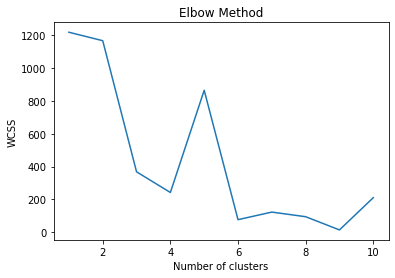

In [5]:
X = np.array(grades)
wcss = []

for k in range(1, 11):
    centroids, labels, wcss_k = kmeans_wcss(X.reshape(-1, 1), k)
    wcss.append(wcss_k)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From this graph, we would choose k=4, which is where the graph appears to level off. As we can see, the Elbow Method can be a useful visual tool to help us choose k.

#### Application 2: Breast cancer data (with p=30 features)

In [6]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
centroids, labels = kmeans_simple(X, k=2, tolerance=0.01)
[TN, FP], [FN, TP] = confusion_matrix(y, labels)

In [7]:
confusion_matrix(y, labels)

array([[177,  35],
       [ 16, 341]])

From this confusion matrix, we can calculate the accuracy and precision to see how well this simple kmeans performs.

In [8]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9103690685413005

In [9]:
precision = TP / (TP + FP)
precision

0.9069148936170213

From our confusion matrix, accuracy, and precision calculations, we can see that a simple k-means with random cluster initialization performs relatively well, even on multidimensional data.

#### A variation of kmeans algorithm: kmeans ++

K-means++ is an extension of the standard k-means clustering algorithm that addresses the issue of initialization bias. In k-means clustering, the algorithm initializes the cluster centers randomly, which can result in suboptimal clustering performance. K-means++ attempts to improve this initialization by selecting the initial cluster centers in a more intelligent way.

The k-means++ algorithm starts by randomly selecting a single data point from the input dataset as the first cluster center. It then iteratively selects the next cluster center as the data point that is furthest away from the previously selected centers. Specifically, the probability of selecting a data point as the next center is proportional to the square of its distance to the closest existing center.

This process continues until all K cluster centers have been selected. The remaining steps of the k-means algorithm are then carried out as usual.

The k-means++ initialization strategy has been shown to result in more accurate and stable clustering than random initialization, particularly for large datasets and high-dimensional spaces. However, it can be slower than the standard k-means initialization because it requires more computation to select the initial cluster centers.

Overall, k-means++ is a useful enhancement to the k-means algorithm that can improve clustering performance, particularly when the number of clusters is relatively large or the dataset is high-dimensional.


##### In order to perform kmeans++, we need a means of selecting centroids. 

The first centroid is selected randomly, like kmeans. 

Then, the next centroid is calculated by computing the distance between each data point and the nearest centroid, and the point farthest away from the existing centroids is chosen as the next centroid. This is to ensure that the initial centroids are well spread out across the data. This process continues until all k centroids are assigned.

##### The updated kmeans function uses the select_centroids function and includes the kmeans++ initialization option.

The only difference between this function and the simple kmeans function is that it includes the option of using kmeans++ for the initial centroid initialization. If this parameter (kmeans++) is specified, the method of selecting centroids will be used instead of being chosen randomly.

#### Application: Performing k-means++ on an image (image compression)

A popular application of kmeans is image compression because it can identify clusters in an image and represent them with a centroid, which greatly reduces file size without sacrificing too much visual quality. Here we will perform kmeans on a simple black and white image, where the quality is reduced but the overall picture is still visible. 

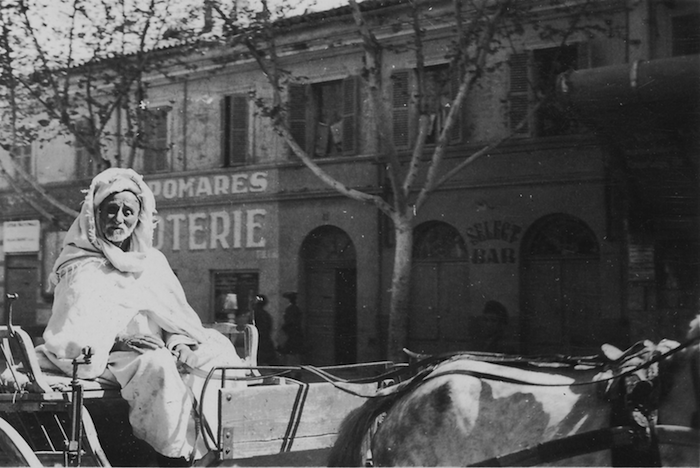

In [10]:
Image(filename='test_img.png') 

Using k=4:

In [11]:
k=4
image = cv2.imread('test_img.png')
h, w, _ = image.shape
X = np.asarray(image)
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels]

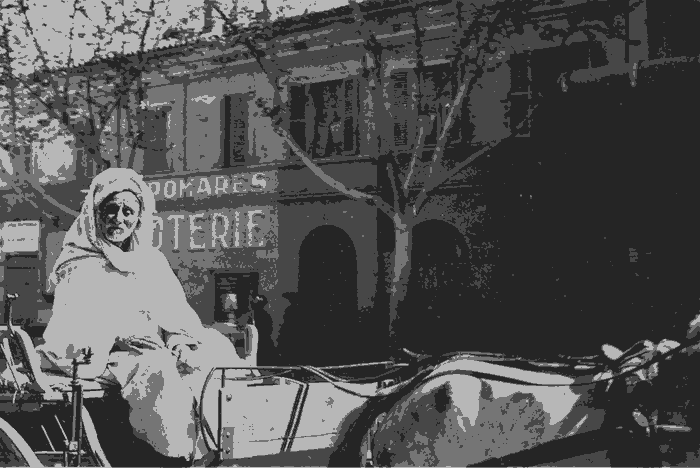

In [12]:
img_ = PIL_Image.fromarray(X.reshape((h,w,3)))
img_

The image looks like the original, just not as clear and missing some details. As we can see, k-means++ performs well for image compression.

But kmeans(++) also has its limitations, such as its sensitivity to the original centroids as well as the assumpton of spherical clusters.
##### Let's take a quick look at how k means performs on disjoint and nested structures.

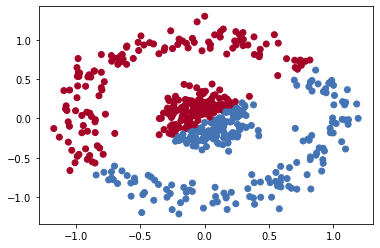

In [13]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans_simple(X, 2)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

Clearly k-means did not correctly recognize the center circle as a cluster and the outer ring as a second cluster. This because k-means calculates distances and uses this to measure how closely related the points are, so it struggles to recognize nested or disjoint structures.

### Density-based clustering algorithms (DBSCAN)

To combat this issue with kmeans, we will use a density-based clustering algorithm called DBSCAN (Density Based Spatial Clustering of Applications with Noise).
DBSCAN works by grouping together points that are close to each other and have a high density of neighboring points. 

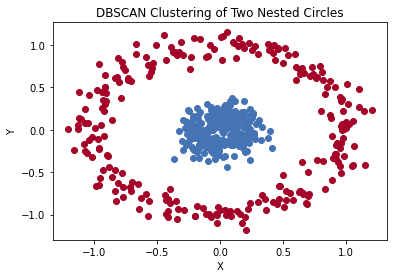

In [14]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)

# Create a DBSCAN clustering object with eps=0.2 and min_samples=5
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
inner_circle = X[labels == 0]
outer_circle = X[labels == 1]

# Plotting
plt.scatter(inner_circle[:, 0], inner_circle[:, 1], color='#4574B4')
plt.scatter(outer_circle[:, 0], outer_circle[:, 1], color='#A40227')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering of Two Nested Circles')
plt.show()

A great thing about DBSCAN is that it does not require the number of clusters to be specified in advance and can automatically determine the number of clusters in the data using two parameters: epsilon and minimum points. If a group of points has at least the specified number of minimum points within a distance of epsilon, it is considered a dense region, and a cluster is formed.

A drawback is that DBSCAN can be sensitive to the choice of its two main parameters, epsilon and minimum points. Selecting these parameters can be challenging with datasets where the density varies greatly across the dataset or when clusters have different densities.

##### Let's take a look at an example where DBSCAN performs poorly

In this example data, there are five clusters.

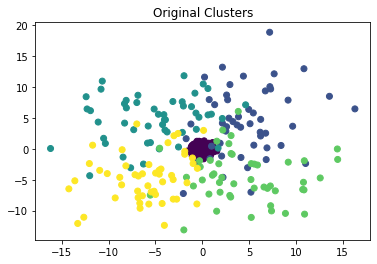

In [15]:
X = np.concatenate((np.random.randn(500, 2) * 0.5,
                    np.random.randn(50, 2) * 4 + np.array([5, 5]),
                    np.random.randn(50, 2) * 4 + np.array([-5, 5]),
                    np.random.randn(50, 2) * 4 + np.array([5, -5]),
                    np.random.randn(50, 2) * 4 + np.array([-5, -5])
                   ))

labels = np.concatenate((np.zeros(500), np.ones(50), np.ones(50) * 2, np.ones(50) * 3, np.ones(50) * 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Original Clusters')
plt.show()

 We can see that the cluster in the center is much denser than the four on the outside. This causes some trouble for DBSCAN clustering.

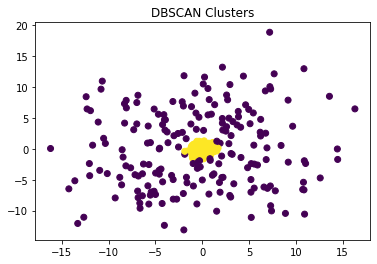

In [16]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('DBSCAN Clusters')
plt.show()

As expected, because of the dense center and relatively equally spaced outside points, DBSCAN is unable to recognize the separation of the four outer clusters. However, it can still be useful when combined with other methods.

#### DBSCAN is sensitive to hyperparameters

One other thing to note is that DBSCAN is sensitive to its inital hyperparameters, epsilon and min_samples. 

##### In this example, we will initialize epsilon with 0.1 and min_samples to 10.

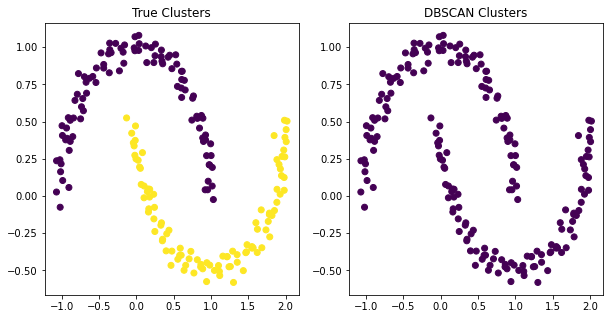

In [17]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.1, min_samples=10)
labels = dbscan.fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0].set_title('True Clusters')
axs[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
axs[1].set_title('DBSCAN Clusters')

plt.show()

As we can see, DBSCAN is unable to recognize the two different clusters. One observation from this plot is that the min_samples parameter may be too large. Let's try decreasing it to see what happens.

##### Keeping epsilon at 0.1 and decreasing min_samples to 5:

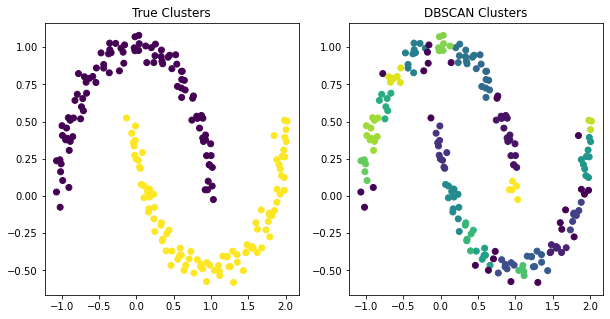

In [18]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0].set_title('True Clusters')
axs[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
axs[1].set_title('DBSCAN Clusters')
plt.show()

Woah, now we can see that epsilon may be too small. Recall that epsilon is the maximum distance between two points in a cluster (beyond which they are considered to be in different clusters). 

##### Let's increase epsilon to 0.3 (while holding min_samples constant) and see what happens.

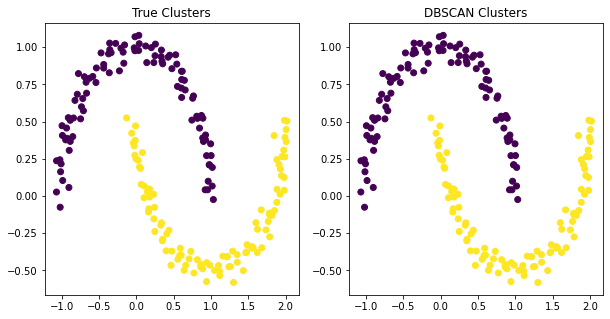

In [19]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axs[0].set_title('True Clusters')
axs[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
axs[1].set_title('DBSCAN Clusters')
plt.show()

Yay! We have found our optimal hyperparameters. This is a simple approach to tuning epsilon and min_samples. 

##### Tuning the epsilon and min_samples parameters in DBSCAN

In practice, we can follow this trial and error process and use different values of these parameters to evaluate the  clustering performance. Since we won't know the true clusters, we can use metrics such as silhouette score to gauge performance. Grid search or randomized search can also be used to find the optimal combination of parameters for the given data.

### Summary

##### kmeans(++) clustering

kmeans is a useful unsupervised algorithm used to cluster data points into groups. However, the algorithm's performance may be sensitive to the initial centroids, leading to suboptimal clustering results.

kmeans++ is an improvement over the standard k-means algorithm that addresses the sensitivity to the initial centroid problem. This approach helps to ensure that the initial centroids are well-spaced and representative of the underlying data distribution, leading to more accurate clustering results. kmeans++ can also outperform the standard k-means algorithm in terms of convergence speed and clustering accuracy.

Overall, kmeans clustering is a popular algorithm with many interesting applications, such as anomaly detection, gene analysis in bioinformatics, and document similarity. 

##### Density-based clustering

Another clustering algorithm we explored is DBSCAN, a density-based algorithm which is able to identify clusters of arbitrary shape. Instead of looking at distance like kmeans and kmeans++, it looks at the density of points to form clusters. 

DBSCAN can handle noise and outliers effectively, and another benefit is that the number of clusters does not have to be specified beforehand. Some downsides are that the algorithm can be sensitive to the choice of its two main parameters and tends to struggle with clusters of varying density as well as high-dimensional data.

An algorithm similar to DBSCAN that uses hierarchical clustering to handle clusters of varying density is HDBSCAN (hierarchical DBSCAN). Other density-based algorithms include OPTICS (ordering points to identify cluster structure) and mean shift (finding the maximum density of data points and shifting points to the local max). 

As we can see, there are many types of clustering algorithms to explore, all with their own strengths and weaknesses. kmeans, kmeans++, and DBSCAN are widely used and effective unsupervised learning techniques that can identify patterns in data and be applied to a variety of domains.